1️⃣ Charger une image et ajouter du bruit

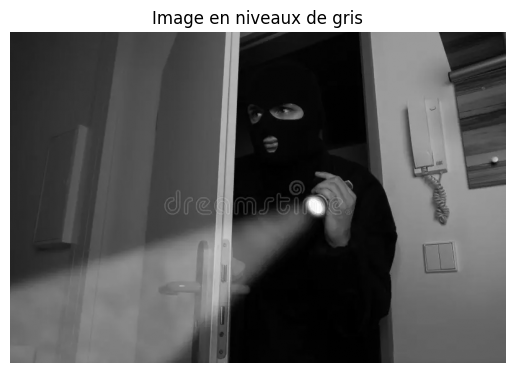

In [7]:
#charger une image avec OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt

#charger une image
image = cv2.imread("thief_door.jpg", cv2.IMREAD_GRAYSCALE)
#afficher l'image
if image is None:
    print("Impossible de lire l'image")
else:
    plt.imshow(image, cmap='gray')
    plt.title('Image en niveaux de gris')
    plt.axis("off")
    plt.show()


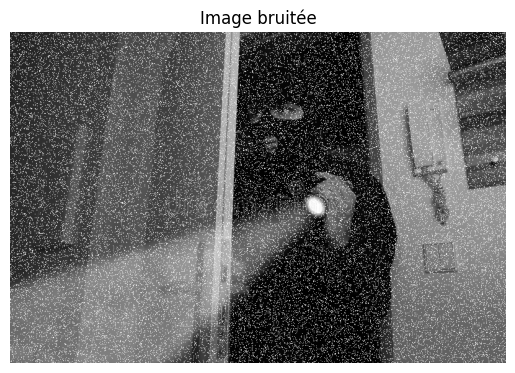

In [8]:
#Ajouter du bruit speckle
#image bruitée
image_bruitee = np.copy(image)
rows, cols = image_bruitee.shape
for i in range(rows):
    for j in range(cols):
        if np.random.rand() < 0.1:
            image_bruitee[i, j] = 255

#afficher l'image bruitée
plt.imshow(image_bruitee, cmap='gray')
plt.title('Image bruitée')
plt.axis("off")
plt.show()

2️⃣ Appliquer des filtres de débruitage

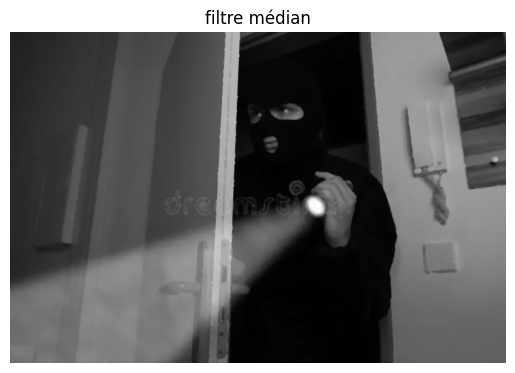

In [18]:
#appliquer filtre de débruitage
#filtre médian
image_debruitee = cv2.medianBlur(image_bruitee, 5)
#afficher l'image débruitée
plt.imshow(image_debruitee, cmap='gray')
plt.title('filtre médian')
plt.axis("off")
plt.show()


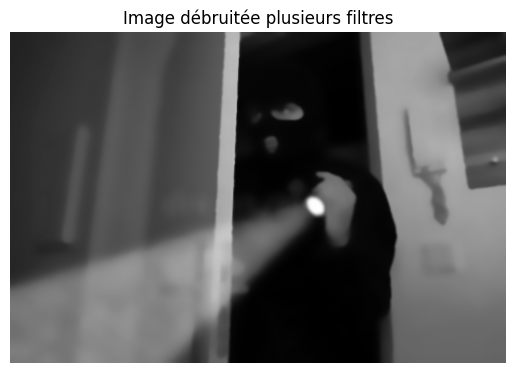

In [19]:
#filtre bilatéral
image_debruitee_bilateral = cv2.bilateralFilter(image_bruitee, 9, 75, 75)
image_median = cv2.medianBlur(image_debruitee_bilateral, 5)
image_debruitee_filtres = cv2.fastNlMeansDenoising(image_median, None, 30, 7, 21)


#afficher l'image débruitée
plt.imshow(image_debruitee_filtres, cmap='gray')
plt.title('Image débruitée plusieurs filtres')
plt.axis("off")
plt.show()

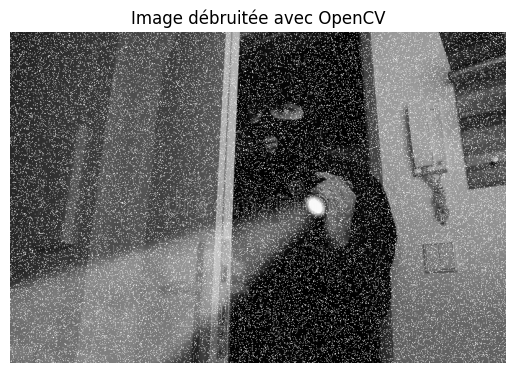

In [20]:
#Denoising avancé avec OpenCV (ex: cv2.fastNlMeansDenoising)
image_debruitee_advanced = cv2.fastNlMeansDenoising(image_bruitee, None, 10, 7, 21)
#afficher l'image débruitée
plt.imshow(image_debruitee_advanced, cmap='gray')
plt.title('Image débruitée avec OpenCV')
plt.axis("off")
plt.show()

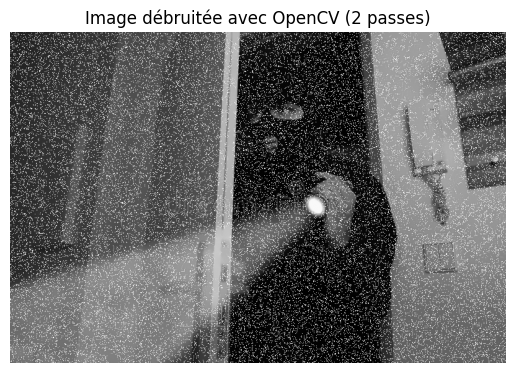

In [21]:
# 1. Première passe du débruitage avancé
image_denoised_1 = cv2.fastNlMeansDenoising(image_bruitee, None, 15, 7, 21)

# 2. Deuxième passe pour affiner le résultat
image_denoised_2 = cv2.fastNlMeansDenoising(image_denoised_1, None, 10, 5, 15)

#afficher l'image débruitée
plt.imshow(image_denoised_2, cmap='gray')
plt.title('Image débruitée avec OpenCV (2 passes)')
plt.axis("off")
plt.show()


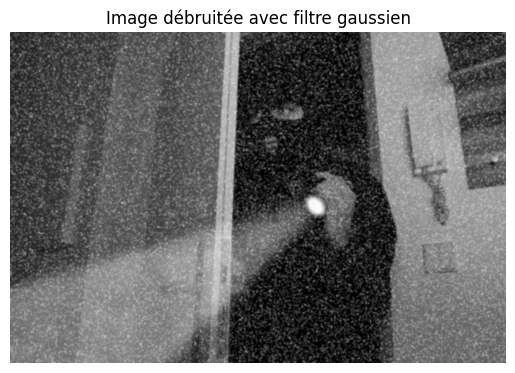

In [22]:
#filtre gaussien
image_debruitee_gaussien = cv2.GaussianBlur(image_bruitee, (5, 5), 0)
#afficher l'image débruitée
plt.imshow(image_debruitee_gaussien, cmap='gray')
plt.title('Image débruitée avec filtre gaussien')
plt.axis("off")
plt.show()

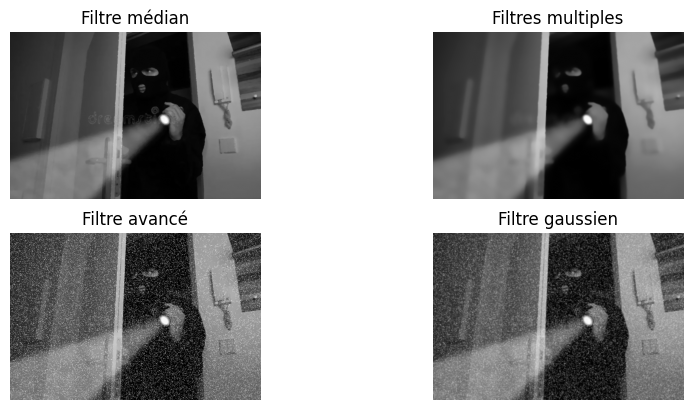

In [24]:
#comparer tout les filtres avec l'image originale
plt.figure(figsize=(10, 10))
plt.subplot(4, 2, 1)
plt.imshow(image_debruitee, cmap='gray')
plt.title('Filtre médian')
plt.axis("off")

plt.subplot(4, 2, 2)
plt.imshow(image_debruitee_filtres, cmap='gray')
plt.title('Filtres multiples')
plt.axis("off")

plt.subplot(4, 2, 3)
plt.imshow(image_denoised_2, cmap='gray')
plt.title('Filtre avancé')
plt.axis("off")

plt.subplot(4, 2, 4)
plt.imshow(image_debruitee_gaussien, cmap='gray')
plt.title('Filtre gaussien')
plt.axis("off")

plt.show()

3️⃣ Comparer les résultats

In [26]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

#calculer le PSNR et SSIM

In [ ]:
#calculer le PSNR pour le débruitage avec filtre médian
psnr_median = psnr(image, image_debruitee)
ssim_median = ssim(image, image_debruitee)
print("PSNR (filtre médian):", psnr_median)
print("SSIM (filtre médian):", ssim_median)


PSNR (filtre médian): 35.382239941606514
SSIM (filtre médian): 0.9642594538789875


In [28]:
#calculer le PSNR pour le débruitage avec filtres multiples
psnr_filtres = psnr(image, image_debruitee_filtres)
ssim_filtres = ssim(image, image_debruitee_filtres)
print("PSNR (filtres multiples):", psnr_filtres)
print("SSIM (filtres multiples):", ssim_filtres)

PSNR (filtres multiples): 31.370316944772124
SSIM (filtres multiples): 0.9042888009579594


In [29]:
#calculer le PSNR pour le débruitage avec filtre avancé
psnr_advanced = psnr(image, image_denoised_2)
ssim_advanced = ssim(image, image_denoised_2)
print("PSNR (filtre avancé):", psnr_advanced)
print("SSIM (filtre avancé):", ssim_advanced)


PSNR (filtre avancé): 12.732398635354734
SSIM (filtre avancé): 0.08996574816891116


In [30]:
#calculer le PSNR pour le débruitage avec filtre gaussien
psnr_gaussien = psnr(image, image_debruitee_gaussien)
ssim_gaussien = ssim(image, image_debruitee_gaussien)
print("PSNR (filtre gaussien):", psnr_gaussien)
print("SSIM (filtre gaussien):", ssim_gaussien)


PSNR (filtre gaussien): 20.32698857188695
SSIM (filtre gaussien): 0.3319941538662454
